In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sp
import seaborn as sns
import itertools

In [2]:
rate=pd.read_csv("Makaan_Properties_Buy.csv",sep=",", encoding="cp1252")

In [3]:
rate.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [4]:
rate.shape

(332096, 32)

In [5]:
rate.tail()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
332091,Rajlaxmi RaajLaxmi Towers,10324765,Apartment,Under Construction,"9,826",4 months ago,https://www.makaan.com/mumbai/rajlaxmi-develop...,561277.0,Rajlaxmi Developers Mumbai,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
332092,Rajlaxmi RaajLaxmi Towers,15076701,Apartment,Under Construction,"8,568",4 months ago,https://www.makaan.com/mumbai/rajlaxmi-develop...,561277.0,Rajlaxmi Developers Mumbai,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
332093,Rajlaxmi RaajLaxmi Towers,10324762,Apartment,Under Construction,"9,861",4 months ago,https://www.makaan.com/mumbai/rajlaxmi-develop...,561277.0,Rajlaxmi Developers Mumbai,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
332094,Rajlaxmi RaajLaxmi Towers,15076700,Apartment,Under Construction,"8,813",4 months ago,https://www.makaan.com/mumbai/rajlaxmi-develop...,561277.0,Rajlaxmi Developers Mumbai,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
332095,Rajlaxmi RaajLaxmi Towers,14683740,Apartment,Under Construction,"9,859",4 months ago,https://www.makaan.com/mumbai/rajlaxmi-develop...,561277.0,Rajlaxmi Developers Mumbai,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [6]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332096 entries, 0 to 332095
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             217826 non-null  object 
 1   Property_id               332096 non-null  int64  
 2   Property_type             332096 non-null  object 
 3   Property_status           271654 non-null  object 
 4   Price_per_unit_area       332096 non-null  object 
 5   Posted_On                 332096 non-null  object 
 6   Project_URL               332096 non-null  object 
 7   builder_id                149978 non-null  float64
 8   Builder_name              149978 non-null  object 
 9   Property_building_status  332096 non-null  object 
 10  City_id                   332096 non-null  int64  
 11  City_name                 332096 non-null  object 
 12  No_of_BHK                 332096 non-null  object 
 13  Locality_ID               332096 non-null  i

In [7]:
rate.Property_status.unique()

array(['Under Construction', 'Ready to move', nan], dtype=object)

In [8]:
rate.isnull().sum()

Property_Name               114270
Property_id                      0
Property_type                    0
Property_status              60442
Price_per_unit_area              0
Posted_On                        0
Project_URL                      0
builder_id                  182118
Builder_name                182118
Property_building_status         0
City_id                          0
City_name                        0
No_of_BHK                        0
Locality_ID                      0
Locality_Name                    2
Longitude                        0
Latitude                         0
Price                            0
Size                             0
Sub_urban_ID                     0
Sub_urban_name                   0
description                      1
is_furnished                     0
listing_domain_score             0
is_plot                          0
is_RERA_registered               0
is_Apartment                     0
is_ready_to_move                 0
is_commercial_Listin

In [9]:
print(rate["Property_Name"].value_counts())

Purvanchal vihar                          6325
B kumar and brothers the passion group    5846
Ambey valley                              3518
abcd                                      1651
Dreams valley                             1629
                                          ... 
Silver Vista                                 1
Silver Prestige                              1
Z Residences                                 1
Sukhsathi apartment                          1
Hallmark Haptom Orakshir                     1
Name: Property_Name, Length: 34387, dtype: int64


In [10]:
print(rate["Property_type"].value_counts())

Apartment            188922
Residential Plot      93765
Independent Floor     22554
Independent House     13553
Villa                 13302
Name: Property_type, dtype: int64


In [11]:
print(rate["No_of_BHK"].value_counts())

0 BHK     93765
2 BHK     93110
3 BHK     74447
1 BHK     39507
4 BHK     22533
5 BHK      3596
1 RK       3055
6 BHK       976
10 BHK      327
7 BHK       314
8 BHK       256
9 BHK       161
15 BHK       15
12 BHK       14
11 BHK       14
3 RK          2
14 BHK        2
2 RK          2
Name: No_of_BHK, dtype: int64


In [12]:
print(rate["Property_Name"].value_counts())

Purvanchal vihar                          6325
B kumar and brothers the passion group    5846
Ambey valley                              3518
abcd                                      1651
Dreams valley                             1629
                                          ... 
Silver Vista                                 1
Silver Prestige                              1
Z Residences                                 1
Sukhsathi apartment                          1
Hallmark Haptom Orakshir                     1
Name: Property_Name, Length: 34387, dtype: int64


In [13]:
print(rate["is_ready_to_move"].value_counts())

True     179800
False    152296
Name: is_ready_to_move, dtype: int64


In [14]:
print(rate["is_furnished"].value_counts())

Unfurnished       245783
Semi-Furnished     72042
Furnished          14271
Name: is_furnished, dtype: int64


In [15]:
print(rate["Property_status"].value_counts())

Ready to move         179800
Under Construction     91854
Name: Property_status, dtype: int64


In [16]:
print(rate.value_counts())

Property_Name                      Property_id  Property_type     Property_status     Price_per_unit_area  Posted_On     Project_URL                                                                                           builder_id  Builder_name                    Property_building_status  City_id  City_name  No_of_BHK  Locality_ID  Locality_Name              Longitude  Latitude   Price        Size         Sub_urban_ID  Sub_urban_name  description                                                                                                                                                                                                  is_furnished    listing_domain_score  is_plot  is_RERA_registered  is_Apartment  is_ready_to_move  is_commercial_Listing  is_PentaHouse  is_studio  Listing_Category
 323 Brahmapur                     14025326     Apartment         Under Construction  4,886                3 months ago  https://www.makaan.com/kolkata/peess-con-indiareality-pvt-ltd-323-b

In [17]:
plt.figure(figsize=(30,18))  #figuresize define
sns.set(font_scale=1) #fontsize 


<Figure size 2160x1296 with 0 Axes>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Apartment'),
  Text(1, 0, 'Independent House'),
  Text(2, 0, 'Villa'),
  Text(3, 0, 'Independent Floor'),
  Text(4, 0, 'Residential Plot')])

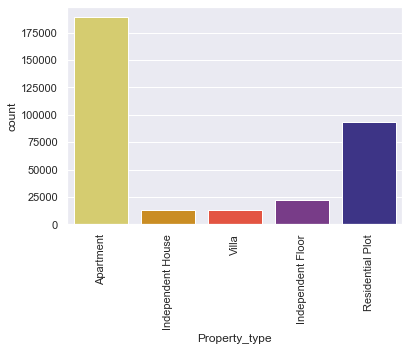

In [18]:
sns.countplot(x="Property_type", data=rate, palette="CMRmap_r")
plt.xticks(rotation=90)
